In [15]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16

In [16]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.InteractiveSession(config=config)

/home/sunt/anaconda3/envs/tf2/lib/python3.8/site-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [24]:
def create_model():
    base_model = VGG16(
        input_shape=(300,300,3),
        include_top=False,
        weights='imagenet'
    )
    
    for layer in base_model.layers:
        layer.trainable = False
        
    head_model = base_model.output
    head_model = layers.Flatten()(head_model)
    head_model = layers.Dense(1024, activation='relu')(head_model)
    head_model = layers.Dropout(0.2)(head_model)
    head_model = layers.Dense(1, activation='sigmoid')(head_model)

    model = Model(inputs=base_model.input, outputs=head_model)
    model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])
    
    return model

In [25]:
def data_gen():
    training_datagen = ImageDataGenerator(
        rescale=1/255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    validation_datagen = ImageDataGenerator(
        rescale=1/255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    training_generator = training_datagen.flow_from_directory(
        'horse-and-humand/train',
        target_size=(300,300),
        batch_size=32,
        class_mode='binary'
    )
    
    validation_generator = validation_datagen.flow_from_directory(
        'horse-and-humand/validation',
        target_size=(300,300),
        batch_size=32,
        class_mode='binary'
    )
    
    return training_generator, validation_generator

In [26]:
callback_1 = ModelCheckpoint(
    'horse-humand_model_checkpoint/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5',
    monitor='val_acc',
    save_best_only=True,
    save_weights_only=True,
    save_freq='epoch',
    mode='auto',
    verbose=1
)

callback_2 = EarlyStopping(monitor='val_loss', patience=5)

In [18]:
model = create_model()
training_generator, validation_generator = data_gen()

58892288/58889256 [==============================] - 8s 0us/step
Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [27]:
history = model.fit(
    training_generator,
    epochs=30,
    callbacks=[callback_1, callback_2],
    validation_data=validation_generator,
    verbose=1
)

Epoch 1/30
65/65 [==============================] - ETA: 0s - loss: 0.1342 - acc: 0.9786
Epoch 00001: val_acc improved from -inf to 0.91797, saving model to horse-humand_model_checkpoint/weights-improvement-01-0.92.hdf5
65/65 [==============================] - 12s 180ms/step - loss: 0.1342 - acc: 0.9786 - val_loss: 0.4456 - val_acc: 0.9180
Epoch 2/30
65/65 [==============================] - ETA: 0s - loss: 0.0992 - acc: 0.9708
Epoch 00002: val_acc did not improve from 0.91797
65/65 [==============================] - 12s 189ms/step - loss: 0.0992 - acc: 0.9708 - val_loss: 0.9824 - val_acc: 0.8594
Epoch 3/30
65/65 [==============================] - ETA: 0s - loss: 0.0501 - acc: 0.9903
Epoch 00003: val_acc improved from 0.91797 to 0.95312, saving model to horse-humand_model_checkpoint/weights-improvement-03-0.95.hdf5
65/65 [==============================] - 13s 194ms/step - loss: 0.0501 - acc: 0.9903 - val_loss: 0.1794 - val_acc: 0.9531
Epoch 4/30
65/65 [==============================] - 

In [11]:
model.save('horse-humand-mode.h5')

In [28]:
def plot_chart(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
    plt.figure(figsize=(10, 6))

    plt.plot(epochs, acc, 'r', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.plot(epochs, loss, 'g', label='Training Loss')
    plt.plot(epochs, val_loss, 'y', label='Validation Loss')

    plt.title('Traing and Validation, Accuracy and Loss')
    plt.legend(loc=0)
    plt.show()

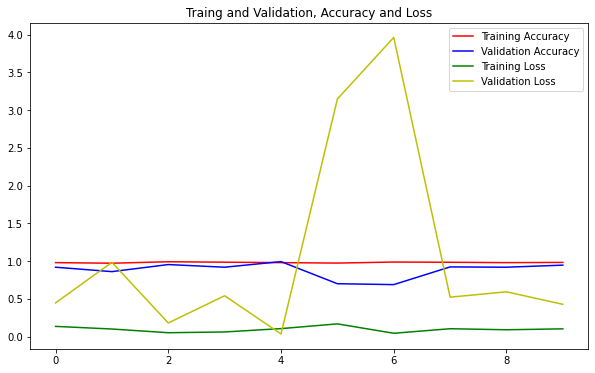

In [29]:
plot_chart(history)